In [2]:
!pip install matplotlib

In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RiGun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RiGun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RiGun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
all_files = glob.glob('C:/Users/RiGun/Python/영문분석(워드클라우드)/myCabinetExcelData*.xls')
all_files  # 출력하여 내용 확인

['C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (1).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (2).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (3).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (4).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (5).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (6).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (7).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (8).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData (9).xls',
 'C:/Users/RiGun/Python/영문분석(워드클라우드)\\myCabinetExcelData.xls']

In [6]:
all_files_data = [] # 저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0] # 작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
1,NaN,2,Analyzing Big Smart Metering Data Towards Diff...,"Pan, E.; Wang, D.; Han, Z.",unknown,2016
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
4,NaN,5,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
...,...,...,...,...,...,...
95,NaN,96,A Detailed Review on the Prominent Compression...,"Anuradha, D.; Bhuvaneswari, S.",Springer Science + Business Media,2016
96,NaN,97,Divide and recombine (D&R) data science projec...,"Tung, Wen-wen; Barthur, Ashrith; Bowers, Matth...",Springer Nature,2018
97,NaN,98,An overview of online based platforms for shar...,"Chen, Yang; Wang, Zhong‐yi; Yuan, Gang; Huang,...",John Wiley & Sons Ltd,2017
98,NaN,99,A Survey on Data Collection for Machine Learni...,"Roh, Yuji; Heo, Geon; Whang, Steven Euijong",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021


In [7]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
1,NaN,2,Analyzing Big Smart Metering Data Towards Diff...,"Pan, E.; Wang, D.; Han, Z.",unknown,2016
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
4,NaN,5,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
...,...,...,...,...,...,...
995,NaN,96,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
996,NaN,97,A big data analytics framework for border cros...,"Wang, Haibo; Huo, Da; Xu, Yaquan",Inderscience,2017
997,NaN,98,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
998,NaN,99,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014


In [8]:
all_files_data_concat.to_csv('C:/Users/RiGun/Python/영문분석(워드클라우드)/riss_bigdata.csv', encoding='utf-8', index=False)

In [9]:
all_title = all_files_data_concat['제목']
all_title # 출력하여 내용 확인

0      Health big data analytics: current perspective...
1      Analyzing Big Smart Metering Data Towards Diff...
2      Improved big data stock index prediction using...
3      Guest Editorial: Big Scholar Data Discovery an...
4      Guest Editorial: Big Scholar Data Discovery an...
                             ...                        
995    Improved big data stock index prediction using...
996    A big data analytics framework for border cros...
997    Health big data analytics: current perspective...
998              Intelligent big data analysis: a review
999                          Scalable big data modelling
Name: 제목, Length: 1000, dtype: object

In [10]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [11]:
words = [] 
for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in  EnWordsTokenStop]         
    words.append(EnWordsTokenStopLemma)


In [12]:
print(words) # 출력하여 내용 확인

[['health', 'big', 'data', 'analytics', 'current', 'perspective', 'challenge', 'potential', 'solution'], ['analyzing', 'big', 'smart', 'metering', 'data', 'towards', 'differentiated', 'user', 'service', 'sublinear', 'approach'], ['improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets'], ['guest', 'editorial', 'big', 'data', 'infrastructure'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center'], ['smart', 'monitoring', 'camera', 'driven', 'intelligent', 'processing', 'big', 'surveillance', 'video', 'data'], ['towards', 'max', 'min'

In [13]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['health', 'big', 'data', 'analytics', 'current', 'perspective', 'challenge', 'potential', 'solution', 'analyzing', 'big', 'smart', 'metering', 'data', 'towards', 'differentiated', 'user', 'service', 'sublinear', 'approach', 'improved', 'big', 'data', 'stock', 'index', 'prediction', 'using', 'deep', 'learning', 'cnn', 'gru', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets', 'guest', 'editorial', 'big', 'data', 'infrastructure', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center', 'smart', 'monitoring', 'camera', 'driven', 'intelligent', 'processing', 'big', 'surveillance', 'video', 'data', 'towards', 'max', 'min', 'fair', 'resource', '

In [14]:
count = Counter(words2)
count #출력하여 내용 확인

Counter({'health': 31,
         'big': 1125,
         'data': 1252,
         'analytics': 93,
         'current': 11,
         'perspective': 26,
         'challenge': 56,
         'potential': 14,
         'solution': 15,
         'analyzing': 6,
         'smart': 26,
         'metering': 4,
         'towards': 14,
         'differentiated': 3,
         'user': 4,
         'service': 22,
         'sublinear': 3,
         'approach': 53,
         'improved': 7,
         'stock': 6,
         'index': 8,
         'prediction': 21,
         'using': 60,
         'deep': 12,
         'learning': 43,
         'cnn': 3,
         'gru': 3,
         'guest': 15,
         'editorial': 17,
         'scholar': 3,
         'discovery': 11,
         'collaboration': 5,
         'web': 8,
         'speed': 1,
         'unveiling': 1,
         'storage': 8,
         'distribution': 9,
         'sub': 1,
         'datasets': 2,
         'infrastructure': 10,
         'thermal': 2,
         'aware': 4,

In [15]:
word_count = dict()
for tag, counts in count.most_common(50):
   if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1252
big : 1125
analytics : 93
based : 89
analysis : 75
using : 60
challenge : 56
driven : 56
approach : 53
new : 48
system : 46
learning : 43
model : 40
science : 37
issue : 36
framework : 34
management : 34
research : 32
health : 31
opportunity : 31
application : 30
platform : 29
era : 28
perspective : 26
smart : 26
earth : 26
machine : 25
processing : 24
cloud : 24
review : 24
special : 24
mining : 23
service : 22
business : 22
survey : 22
network : 22
social : 22
information : 22
prediction : 21
algorithm : 21
technology : 21
use : 21
study : 21
paper : 21
computing : 20
distributed : 20
call : 20
method : 19
energy : 19
development : 18


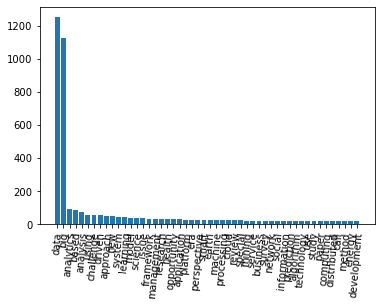

In [16]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [17]:
del word_count['big']
del word_count['data']
plt.show()

In [18]:
all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year #출력하여 내용 확인

,출판일,doc_count
0,1995,1
1,1999,1
2,2003,1
3,2004,1
4,2008,1
5,2009,1
6,2011,7
7,2012,17
8,2013,48
9,2014,143


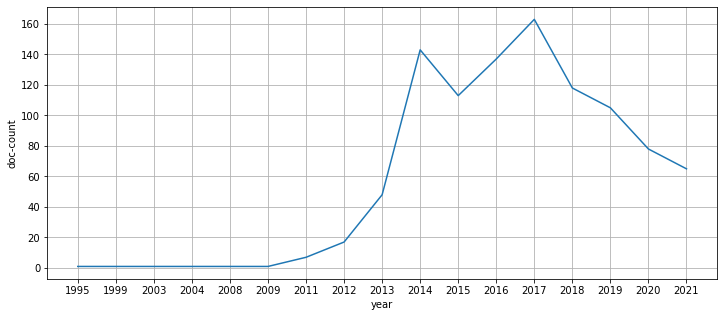

In [19]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()


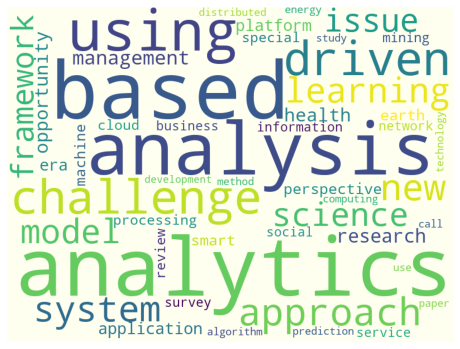

In [20]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
cloud.to_file("C:/Users/RiGun/Python/영문분석(워드클라우드)/riss_bigdata_wordCloud.jpg")